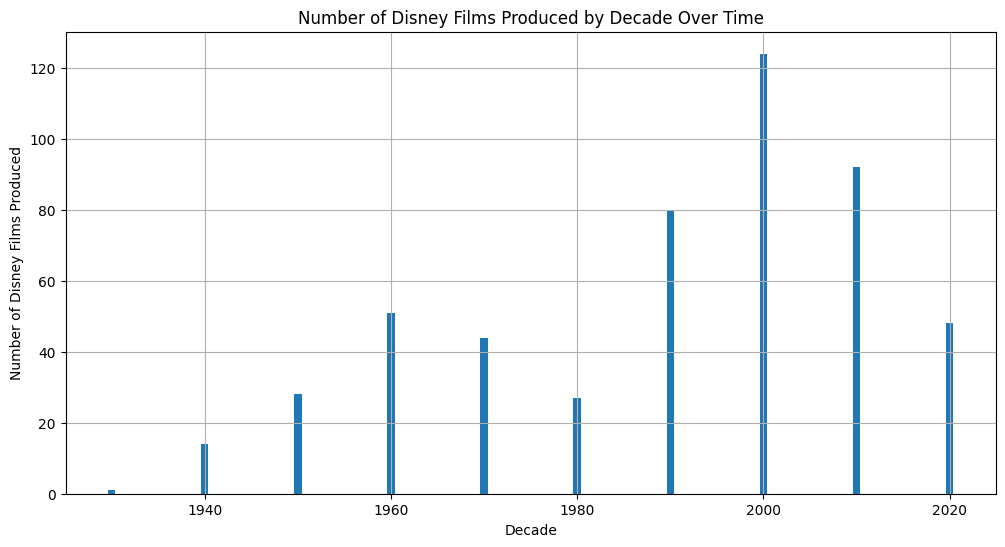

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## DATA COLLECTION -- SEE MARKDOWN BELOW

# Defining URL
wiki_url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"
response = requests.get(wiki_url)

# uses BeautifulSoup to parse thru the website
soup = BeautifulSoup(response.text, "html.parser")

# uses BS to find all tables within the Wiki PaGe
all_tables = soup.find_all("table", {"class": "wikitable"})

## DATA PROCESSING -- SEE MARKDOWN BELOW

# Initialize list
data_list = []

# Loop through each table
for table in all_tables:
    for row in table.find_all("tr")[1:]:  # Skip the header row
        columns = row.find_all(["td", "th"])
        if columns:
            row_data = [column.get_text(strip=True) for column in columns]
            data_list.append(row_data)

# Creates DataFrame to store  data
data = pd.DataFrame(data_list)

# Rename columns
data.columns = ["Title", "U.S. release date", "Notes", "", ""]

# Remove rows with missing U.S. release date
data = data[data["U.S. release date"].str.strip() != ""]

# Converts "U.S. release date" to datetime -- we are looking for a certain format so we can extract just the year
data["U.S. release date"] = pd.to_datetime(data["U.S. release date"], errors="coerce")

# Extract the release year
data["Release Year"] = data["U.S. release date"].dt.year

#Cluster by Decade
data["Decade"] = (data["Release Year"] // 10) * 10

## Data Analysis and Visualization -- SEE MARKDOWN BELOW


# Create a graph shows # of films produced by Disney by decade over time
film_counts_by_decade = data.groupby("Decade").size()

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(film_counts_by_decade.index, film_counts_by_decade.values)
plt.xlabel("Decade")
plt.ylabel("Number of Disney Films Produced")
plt.title("Number of Disney Films Produced by Decade Over Time")
plt.grid(True)

## SAVING AND DISPlAYING RESULTS -- SEE MARKDOWN BELOW

# Save data to CSV file named "DisneyFilms.csv"
data.to_csv("DisneyFilms.csv", index=False)

# Print plot
plt.show()




Data Collection & Processing Steps:

```
Data Collection

Defining URL:
  - The project starts by defining the Wikipedia URL for the list of Walt Disney Pictures films.

Requesting Web Page:
  - Using the `requests` library, the code makes an HTTP request to the Wikipedia page, and uses this to access the HTML content.

Parsing HTML Content:
  - The HTML Wikipedia page content is parsed using BeautifulSoup (`BeautifulSoup`).

Finding Tables:
  - BeautifulSoup is used to find all tables on the Wikipedia page with the class "wikitable," which contains the information we need about Disney films.

Data Processing

Initializing Data List:
  - A list (`data_list`) is initialized to store the extracted data from each table.

Iterating Through Tables and Rows:
  - A loop is implemented to iterate through each table and row on the Wikipedia page; it also skips the header row.  

Extracting Table Cells
  - For each row, the code identifies and extracts table cells (specifically the `td` and `th` elements).

Creating DataFrame:
  - Using pandas (`pd`), a DataFrame (`data`) is created from the extracted data list.

Column Renaming:
  - I renamed the columns "Title," "U.S. release date," "Notes," and two empty columns that are later addressed to make the code easier to call later.

Removing Rows with Missing Release Dates:
  - Rows with missing U.S. release dates are removed from the DataFrame for more clarity.

Converting Release Dates to Datetime:
  - The "U.S. release date" column is converted to datetime format, to make it easier to just extract the year.

Extracting Release Year:
  - The release year is extracted from the "U.S. release date" and added as a new column ("Release Year").

Clustering by Decade:
  - A new column ("Decade") is introduced by clustering films based on their release years, grouping them in increments of ten years (AKA a decade)

Data Analysis and Visualization

Grouping by Decade:
  - The data is grouped by decade, counting the number of films produced in each decade.

Plotting Data:
  - A bar chart is created using matplotlib (`plt`) to visualize the number of Disney films produced by decade over time.

Saving and Displaying Results

Saving to CSV:
  - The processed data is saved to a CSV file named "DisneyFilms.csv" using  `to_csv` method.

Displaying Plot:
  - Now, we display the bar chart, indicating any possible trends in Disney film production over different decades.


```



Summary:

```
Goal: The main function of my prject is to analyze the production trends of Disney films over the decades since 1940. After collecting data from a Wikipedia page listing Disney films, I tried to create a data visualization(s) of the number of films produced by Disney over the different decades. Ultimately, I hoped to find a pattern in production and this could indicate broader trends of the film industry history.

Data Collection: All the data used for the project was from the Wikipedia page "List of Walt Disney Pictures films" using web scraping methods. The Pythonrequests library was used to gather the HTML content, and then I used theBeautifulSoup library to parse through the tables in the page containing relevant information of the films produced each year. The dataset includes attributes such as film title, U.S. release date, and additional notes.

Data Processing: After collecting the data, a few steps were taken to clean up and structure the new dataset. Rows with missing U.S. release dates were taken out as to not skew the data towards any particular decade. The release dates were then converted to the datetime format so that I could sort and cluster the films by decade. A new attribute, Decade," was introduced by clustering films based on release years, grouping them in increments of ten years.

Data Analysis: My main focus analysis-wise was the distribution of Disney film production across decades. The number of films produced in each decade was calculated, giving a comprehensive view of Disney's film production output over time. This information was visualized using a bar chart to illustrate trends/patterns in Disney film production.

Project Documentation: My documentation is provided in the Jupyter Notebook, README file on GitHub, and with the dataset on data.world. Descriptions of each collection/processing step is included in the Markdown sentences within the code. The README on GitHub also includes the project's goal, the license of the data, a data dictionary (on data.world), and information about potential biases & issues in the dataset.

Conclusion: This analysis contributes to a better understanding of Disney's historical film production trends, offering valuable insights for fans and the company alike. The project is designed to be pretty simple/easy to follow. The processed data is available on this data.world, as well as more documentation and a data dictionary.
```

